# Project: Helecious
Developed by:
* Habeeb Idrees
* Ahmad Alsaqqa

# Dataset import

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
path = 'dataset.csv'
dataset = pd.read_csv(path)

In [ ]:
dataset.head()

,date,week_day,store_id,item_name,item_id,sales,returned
0,2020-06-28,Sunday,ام عبدالعزيز العامري,جرانولا,1,2,0
1,2020-06-28,Sunday,ام عبدالعزيز العامري,لبيتو,2,0,0
2,2020-06-28,Sunday,ام عبدالعزيز العامري,جرينتا,3,0,0
3,2020-06-28,Sunday,ام عبدالعزيز العامري,تشكن بف,4,0,0
4,2020-06-28,Sunday,ام عبدالعزيز العامري,تبولة,5,0,0


Displaying demo of the dataset: 



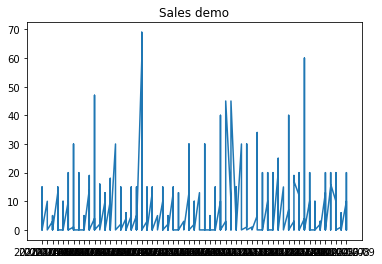

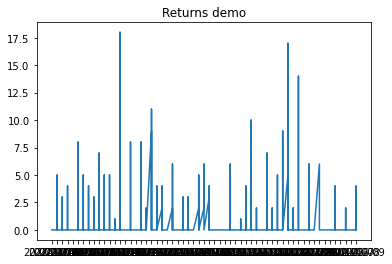

In [ ]:
print('Displaying demo of the dataset: ')

print()

plt.title("Sales demo")
plt.plot(dataset['date'][2500:5000], dataset['sales'][2500:5000])
plt.show()

print()

plt.title("Returns demo")
plt.plot(dataset['date'][2500:5000], dataset['returned'][2500:5000])
plt.show()

# Preprocessing

The following is performed to preprocess the data:
* transform each store_name to a unique id
* transform each date to a unique id. The ids need to be persistent.
* transform each weekday to a unique id. The ids need to be persistent.
* remove the food_name as we already have the id
* ...

Obviously, this is subject to change. So if we think something should be added/removed/changed, then we shall change it.

In [ ]:
from sklearn import preprocessing
import numpy as np

In [ ]:
# Remove the food_name as we already have the id
del dataset['item_name']

In [ ]:
# Initialize label encoder.
le = preprocessing.LabelEncoder()
oe = preprocessing.OrdinalEncoder()
# Transform each store_name to a unique id.
dataset['store_id'] = le.fit_transform(dataset['store_id'])

# Transform each date to a unique id. Encoding is ascending from 0...n-1,
# where n is the number of unique dates
le.fit(np.arange(dataset['date'].shape[0]))
dataset['date'] = le.fit_transform(dataset['date'])

# Transofrm each weekday to a unique id.
le.fit(np.arange(7))
dataset['week_day'] = le.fit_transform(dataset['week_day'])

In [ ]:
dataset.head()

,date,week_day,store_id,item_id,sales,returned
0,0,3,29,1,2,0
1,0,3,29,2,0,0
2,0,3,29,3,0,0
3,0,3,29,4,0,0
4,0,3,29,5,0,0


### Save preprocessed dataset

In [ ]:
save_path = "preprocessed_dataset.csv"
DataFrame.to_csv(dataset, save_path)

# Training model

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
import pandas as pd
from pandas import DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/preprocessed_dataset.csv'
dataset = pd.read_csv(path)

In [ ]:
X = dataset[['date', 'week_day', 'store_id', 'item_id']]
y = dataset['sales']

reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.10962645974694363